<a href="https://colab.research.google.com/github/VismayaS25/CognoRise-InfoTech/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

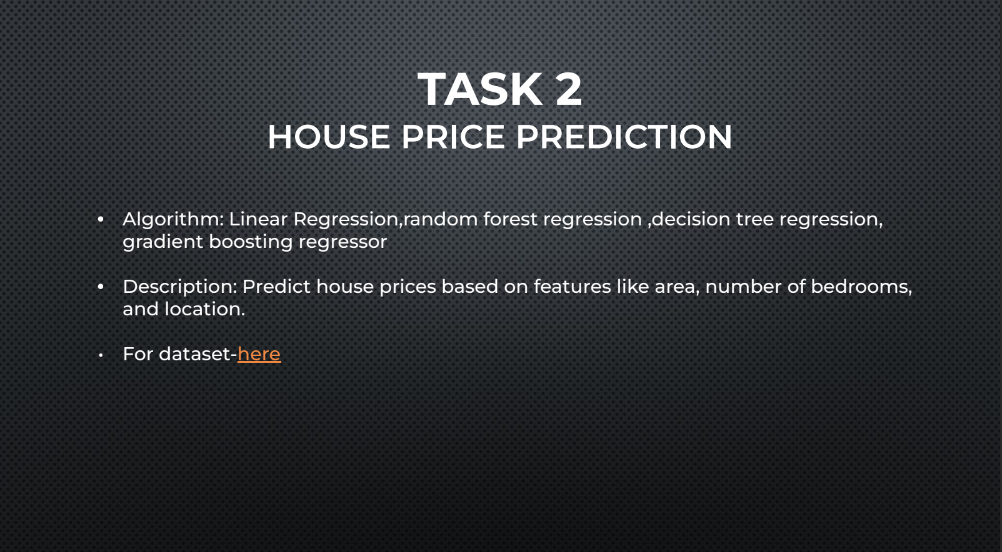

# *Importing Libraries and Packages*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/drive/MyDrive/CognoRise InfoTech/house.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [2]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [3]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [6]:
le=LabelEncoder()
df['price']=le.fit_transform(df['price']).astype(int)
df['street']=le.fit_transform(df['street'])
df['city']=le.fit_transform(df['city'])
df['statezip']=le.fit_transform(df['statezip'])
df['country']=le.fit_transform(df['country'])
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,402,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,62,0
1,2014-05-02 00:00:00,1719,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,58,0
2,2014-05-02 00:00:00,487,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,26,0
3,2014-05-02 00:00:00,706,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,2014-05-02 00:00:00,998,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,384,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3447,35,62,0
4596,2014-07-09 00:00:00,961,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,960,3,6,0
4597,2014-07-09 00:00:00,695,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4033,32,37,0
4598,2014-07-10 00:00:00,110,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,3498,35,71,0


In [7]:
df.drop(['date','street','statezip','waterfront','view','condition'],axis=1,inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,402,3.0,1.50,1340,7912,1.5,1340,0,1955,2005,36,0
1,1719,5.0,2.50,3650,9050,2.0,3370,280,1921,0,35,0
2,487,3.0,2.00,1930,11947,1.0,1930,0,1966,0,18,0
3,706,3.0,2.25,2000,8030,1.0,1000,1000,1963,0,3,0
4,998,4.0,2.50,1940,10500,1.0,1140,800,1976,1992,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,384,3.0,1.75,1510,6360,1.0,1510,0,1954,1979,35,0
4596,961,3.0,2.50,1460,7573,2.0,1460,0,1983,2009,3,0
4597,695,3.0,2.50,3010,7014,2.0,3010,0,2009,0,32,0
4598,110,4.0,2.00,2090,6630,1.0,1070,1020,1974,0,35,0


# *Image presentation*

In [8]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
price,1.000000,0.327815,0.501093,0.618126,0.091639,0.303779,0.541845,0.276257,0.049739,-0.066222,0.118157,NaN
bedrooms,0.327815,1.000000,0.545920,0.594884,0.068819,0.177895,0.484705,0.334165,0.142461,-0.061082,-0.130447,NaN
bathrooms,0.501093,0.545920,1.000000,0.761154,0.107837,0.486428,0.689918,0.298020,0.463498,-0.215886,-0.097026,NaN
sqft_living,0.618126,0.594884,0.761154,1.000000,0.210538,0.344850,0.876443,0.447206,0.287775,-0.122817,-0.109686,NaN
sqft_lot,0.091639,0.068819,0.107837,0.210538,1.000000,0.003750,0.216455,0.034842,0.050706,-0.022730,-0.079135,NaN
floors,0.303779,0.177895,0.486428,0.344850,0.003750,1.000000,0.522814,-0.255510,0.467481,-0.233996,0.078481,NaN
sqft_above,0.541845,0.484705,0.689918,0.876443,0.216455,0.522814,1.000000,-0.038723,0.408535,-0.160426,-0.121701,NaN
sqft_basement,0.276257,0.334165,0.298020,0.447206,0.034842,-0.255510,-0.038723,1.000000,-0.161675,0.043125,-0.001559,NaN
yr_built,0.049739,0.142461,0.463498,0.287775,0.050706,0.467481,0.408535,-0.161675,1.000000,-0.321342,-0.211110,NaN
yr_renovated,-0.066222,-0.061082,-0.215886,-0.122817,-0.022730,-0.233996,-0.160426,0.043125,-0.321342,1.000000,0.075637,NaN


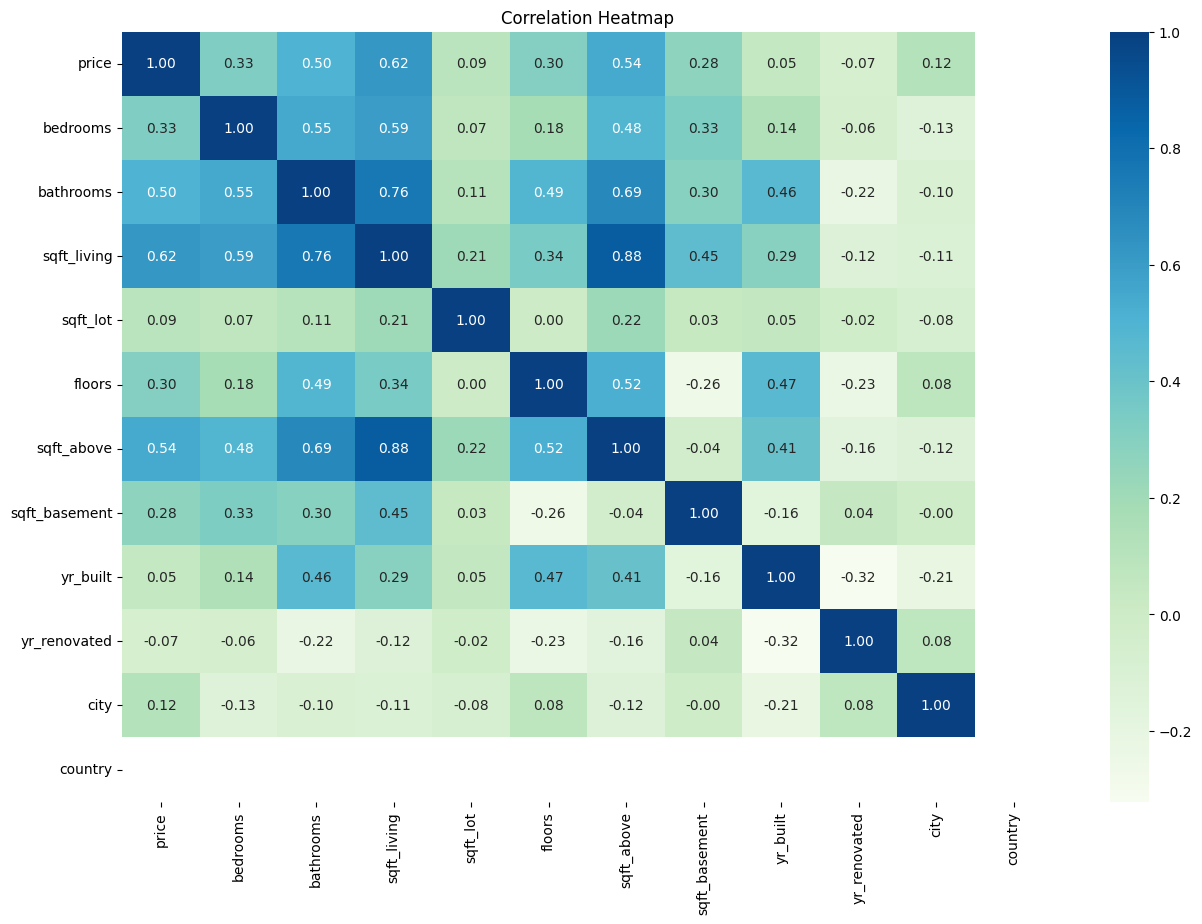

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True, linecolor="black", fmt=".2f", cmap='GnBu')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
X=df.iloc[:,1:]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,3.0,1.50,1340,7912,1.5,1340,0,1955,2005,36,0
1,5.0,2.50,3650,9050,2.0,3370,280,1921,0,35,0
2,3.0,2.00,1930,11947,1.0,1930,0,1966,0,18,0
3,3.0,2.25,2000,8030,1.0,1000,1000,1963,0,3,0
4,4.0,2.50,1940,10500,1.0,1140,800,1976,1992,31,0
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,1510,0,1954,1979,35,0
4596,3.0,2.50,1460,7573,2.0,1460,0,1983,2009,3,0
4597,3.0,2.50,3010,7014,2.0,3010,0,2009,0,32,0
4598,4.0,2.00,2090,6630,1.0,1070,1020,1974,0,35,0


In [11]:
y=df.iloc[:,1]
y

0       3.0
1       5.0
2       3.0
3       3.0
4       4.0
       ... 
4595    3.0
4596    3.0
4597    3.0
4598    4.0
4599    3.0
Name: bedrooms, Length: 4600, dtype: float64

# *Scaling*

In [12]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.33333333, 0.1875    , 0.07365224, ..., 0.99553128, 0.8372093 ,
        0.        ],
       [0.55555556, 0.3125    , 0.24905087, ..., 0.        , 0.81395349,
        0.        ],
       [0.33333333, 0.25      , 0.11845103, ..., 0.        , 0.41860465,
        0.        ],
       ...,
       [0.33333333, 0.3125    , 0.20045558, ..., 0.        , 0.74418605,
        0.        ],
       [0.44444444, 0.25      , 0.13059985, ..., 0.        , 0.81395349,
        0.        ],
       [0.33333333, 0.3125    , 0.08504176, ..., 0.        , 0.20930233,
        0.        ]])

# *Train Test Split*

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

# *Model Creation*

In [14]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
models=[lr,dtr,rfr,gbr]
for model in models:
  print('*****************',model,'*********************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('r2_score:',r2_score(y_test,y_pred)*100)
  print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))
  print('mean_squared_error:',mean_squared_error(y_test,y_pred))
  print('RMSE:' ,np.sqrt(mean_squared_error(y_test,y_pred)))

***************** LinearRegression() *********************
r2_score: 100.0
mean_absolute_error: 4.9797390038175715e-14
mean_squared_error: 2.4838835586623475e-27
RMSE: 4.9838575006337686e-14
***************** DecisionTreeRegressor() *********************
r2_score: 99.8215029452014
mean_absolute_error: 0.0014492753623188406
mean_squared_error: 0.0014492753623188406
RMSE: 0.03806934938134405
***************** RandomForestRegressor() *********************
r2_score: 99.95777652168739
mean_absolute_error: 0.0008768115942028991
mean_squared_error: 0.00034282608695652197
RMSE: 0.018515563371297186
***************** GradientBoostingRegressor() *********************
r2_score: 99.95369079455749
mean_absolute_error: 0.0005439074579148919
mean_squared_error: 0.00037599942795761684
RMSE: 0.01939070467924301


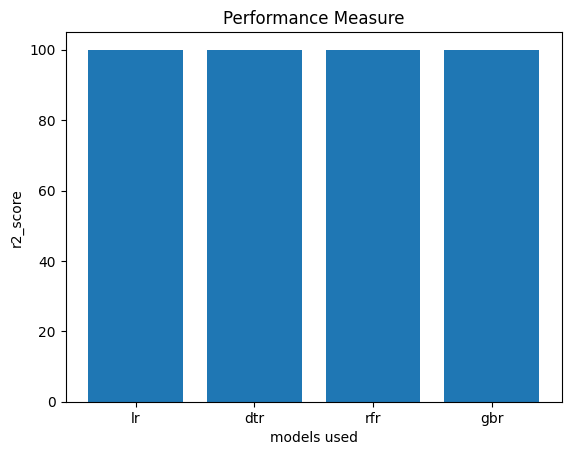

In [15]:
x=['lr','dtr','rfr','gbr']
y=[100.0,100.0,99.96020408163265,99.94368365049144]
plt.bar(x,y)
plt.xlabel('models used')
plt.ylabel('r2_score')
plt.title('Performance Measure')
plt.show()